Collatz rhythm notebook

In [1]:
"""
This notebook analyses the "rhythm", i.e. the periodicity of hypothetical alphas 
that would lead to cycles in a Collatz sequence. The alphas are calculated 
with a specific algorithm. The results produced by this algorithm are 
examined in the notebook.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd


# Helper functions
def _calculate_vn_1(k_factor, starting_node, alpha_list):
    result_list = []
    current_vn_1 = starting_node
    
    for a in alpha_list:
        current_vn_1 = (current_vn_1 * k_factor + 1)/2**a
        result_list.append(current_vn_1)
    
    return result_list


# Configuration
k = 3
max_n = 51
max_value = 101
shuffle_alphas = False
print_table = True

v1 = rnd.randint(1, max_value)

if v1 % 2 == 0:
    v1 = v1 + 1

# v1 = 865

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Calculations
n = pd.Series(range(1, max_n))

# Alpha pred
alpha_pred = (log2(k) * n).astype('int64') + 1

alpha_next = list(alpha_pred[:-1])
alpha_next.insert(0, 0)
alpha_diff = alpha_pred - alpha_next

# Alpha multiples
multiples = [-1]

if k == 3:
    multiples = [4, 4, 2, 4, 2]
elif k == 5:
    multiples = [8, 4, 4]
else:
    multiples = None

multiples = pd.Series(multiples * (int(n.max() / len(multiples)) + 1))
multiples = multiples[0:len(n)]

alpha_diff_multiple = multiples.apply(log2).astype('int64')

# vn+1
alpha_mask = list(alpha_diff)

if shuffle_alphas:
    rnd.shuffle(alpha_mask)

vn_1 = _calculate_vn_1(k, v1, alpha_mask)

# Analyse results
analysis_frame = pd.DataFrame({
    "n": n,
    "alpha_pred": alpha_pred,
    "alpha_diff": alpha_diff,
    "alpha_diff_multiple": alpha_diff_multiple,
    "alpha_mask": alpha_mask,
    "falsified": alpha_diff != alpha_diff_multiple,
    "v1": v1,
    "vn_1": vn_1
})

analysis_frame["alpha_mask_sum"] = analysis_frame["alpha_mask"].cumsum()

# Print results
print_frame = analysis_frame[[
    "n", "alpha_pred", "alpha_diff", "alpha_mask", "alpha_mask_sum", 
    "v1", "vn_1"]]

print_frame.columns = [
    "n", "a_pred", "a_diff", "a_mask", "a_mask_sum", 
    "v1", "vn_1"]

print("v1:", v1, " K:", k, "\n")

if print_table:
    print(print_frame.to_string(index=False), "\n")

v1: 45  K: 3 

  n  a_pred  a_diff  a_mask  a_mask_sum  v1       vn_1
  1       2       2       2           2  45  34.000000
  2       4       2       2           4  45  25.750000
  3       5       1       1           5  45  39.125000
  4       7       2       2           7  45  29.593750
  5       8       1       1           8  45  44.890625
  6      10       2       2          10  45  33.917969
  7      12       2       2          12  45  25.688477
  8      13       1       1          13  45  39.032715
  9      15       2       2          15  45  29.524536
 10      16       1       1          16  45  44.786804
 11      18       2       2          18  45  33.840103
 12      20       2       2          20  45  25.630077
 13      21       1       1          21  45  38.945116
 14      23       2       2          23  45  29.458837
 15      24       1       1          24  45  44.688256
 16      26       2       2          26  45  33.766192
 17      27       1       1          27  45  51.14

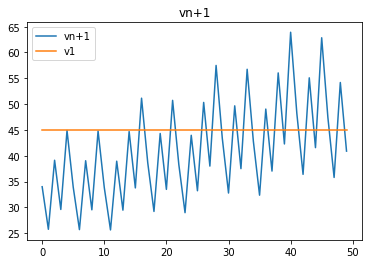

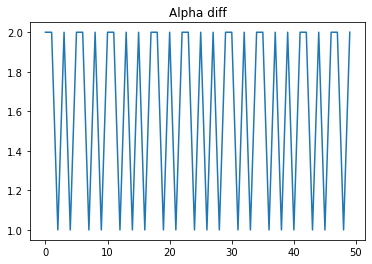

In [2]:
# Plot results
plt.figure()
plt.title("vn+1")
plt.plot(analysis_frame["vn_1"], label='vn+1')
plt.plot(analysis_frame["v1"], label="v1")
plt.legend()

plt.figure()
plt.title("Alpha diff")
plt.plot(analysis_frame["alpha_diff"])

plt.show()